In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reDf = pd.read_csv('Real estate.csv')

print(reDf.shape)
reDf.describe()


(414, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
reDf.rename(columns={
    'X1 transaction date': 'TransactionDate',
    'X2 house age': 'HouseAge',
    'X3 distance to the nearest MRT station': 'DistanceToTheNearestMRTStation',
    'X4 number of convenience stores': 'ConvenienceStores',
    'X5 latitude': 'Latitude',
    'X6 longitude': 'Longitude',
    'Y house price of unit area': 'HousePriceOfUnitArea',

}, inplace = True)
reDf

,No,TransactionDate,HouseAge,DistanceToTheNearestMRTStation,ConvenienceStores,Latitude,Longitude,HousePriceOfUnitArea
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
# Are there any seasonal (monthly) patterns in house pricing?

#   Convert the transaction date into month

def slicing(x):
    x = str(x).split('.')
    y = '0.'+ x[1]
    z = y + '00' if(len(y.split('.')[1]) == 1) else y + '0' if(len(y.split('.')[1]) == 2) else y
    return float(z) * 12
reDf['Monthly'] = reDf.TransactionDate.apply(slicing)
reDf


,No,TransactionDate,HouseAge,DistanceToTheNearestMRTStation,ConvenienceStores,Latitude,Longitude,HousePriceOfUnitArea,Monthly
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,11.004
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,11.004
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,6.996
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,6.000
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,9.996
...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,0.000
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,8.004
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,3.000
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,0.000


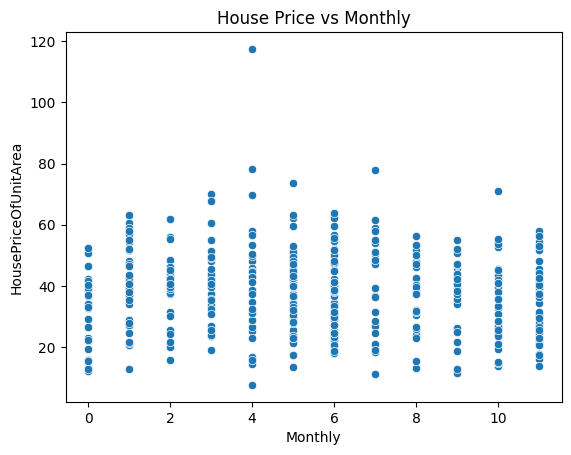

In [ ]:
relationOfPriceAndMonth = reDf.HousePriceOfUnitArea.corr(reDf.Monthly)

sns.scatterplot(x='Monthly', y='HousePriceOfUnitArea', data=reDf)
plt.title('House Price vs Monthly')
plt.show()